# Online shopping Behavior

# Appendix:
- Click on the links:
* <a href= #BusinessProblem> Business Problem</a>
* <a href= #Import> Imports Libraries</a>
* <a href= #ReadData> Read Data</a>
* <a href= #Data_Cleaning_and_Aggregation > Data Cleaning and Aggregation</a>
* <a href= #Exploratory_Data_Analysis> Exploratory Data Analysis </a>
* <a href= #Test>Test</a>
* <a href= #Spliting> Splitting The Data </a>
* <a href= #Baseline> Baseline Model </a> 
* <a href =#ClassImbalance> Class Imbalance </a> 
* <a href =#UnderSampling> Under Sampling </a> 
* <a href = #OverSampling> Over Sampling </a> 
* <a href = #SMOTE> SMOTE </a> 
* <a href = #StandardScaler> Standard Scaler </a> 
* <a href =#LogisticRegression> Logistic Regression </a> 
* <a href = #DecisionTree> Decision Tree </a> 
* <a href= #RandomForest> Random Forest</a>
* <a href= #KNN > KNN   </a>
* <a href= #XGBoost > XGBoost </a>
* <a href= #VotingClassifier > Voting Classifier </a>
* <a href= #MaxVoting > Max Voting </a>
* <a href = #AverageVoting> Average Voting </a> 
* <a href = #WeightedVoting> Weighted Voting </a> 
* <a href = #Stack > Stack </a> 
* <a href = #Graph> Graph </a> 

       

# <a name= 'BusinessProblem'>Business Problem </a>



A shopping website receives more clicks than sales, with fewer potential customers. That means they don't attract their target market, and they must adapt their marketing strategies to boost sales.



# <a name= 'Import'>Imports Libraries </a>

In [6]:
conda install -c glemaitre imbalanced-learn

Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - imbalanced-learn


The following packages will be SUPERSEDED by a higher-priority channel:

  conda              conda-forge::conda-4.11.0-py38h50d173~ --> pkgs/main::conda-4.11.0-py38hecd8cb5_0


Preparing transaction: done
Verifying transaction: done
Executing transaction: done

Note: you may need to restart the kernel to use updated packages.


In [7]:
conda install -c conda-forge imbalanced-learn

Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - imbalanced-learn


The following packages will be SUPERSEDED by a higher-priority channel:

  conda              pkgs/main::conda-4.11.0-py38hecd8cb5_0 --> conda-forge::conda-4.11.0-py38h50d1736_0


Preparing transaction: done
Verifying transaction: done
Executing transaction: done

Note: you may need to restart the kernel to use updated packages.


In [8]:
!conda install -y -c conda-forge xgboost

Solving environment: done

# All requested packages already installed.



In [71]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge , LassoCV ,  RidgeCV,Ridge
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error , plot_roc_curve , roc_auc_score ,  classification_report
from sklearn.preprocessing import PolynomialFeatures , StandardScaler ,MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier ,ExtraTreesClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model, neighbors, ensemble
import statsmodels.api as sm
from plotnine.data import economics
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.classifier import StackingClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score
from imblearn.under_sampling import RandomUnderSampler
economics
sns.set()
import xgboost as xgb
import warnings
import seaborn as sns
%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


/opt/anaconda3/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['interactive']
`%matplotlib` prevents importing * from pylab and numpy


In [72]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import metrics
import pickle
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge , LassoCV ,  RidgeCV,Ridge
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures , StandardScaler 
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model, neighbors, ensemble
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier
from mlxtend.classifier import StackingClassifier
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score,confusion_matrix
import imblearn.under_sampling
import imblearn.over_sampling
from imblearn.over_sampling import SMOTE


sns.set_style("whitegrid")

import warnings
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# <a name= 'ReadData'>Read Data </a>

In [4]:
mydata= pd.read_csv('/Users/ahad/Downloads/online_shoppers_intention (1).csv')
mydata

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [354]:
mydata.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


# <a name= 'Data_Cleaning_and_Aggregation'>Data Cleaning and Aggregation</a>

In [355]:
mydata.isna()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
12326,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
12327,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
12328,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [356]:
mydata.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [357]:
mydata.VisitorType.value_counts()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

In [358]:
mydata.Revenue.value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

In [359]:
mydata.SpecialDay.value_counts()

0.0    11079
0.6      351
0.8      325
0.4      243
0.2      178
1.0      154
Name: SpecialDay, dtype: int64

# <a name= 'Exploratory_Data_Analysis'>Exploratory Data Analysis</a>

In [360]:
counts = mydata.Revenue.value_counts()
not_stable = counts[1]
stable = counts[0]
perc_not_stable = (not_stable/(not_stable+stable))*100
perc_stable = (stable/(not_stable+stable))*100
print('There were {} stable customer ({:.3f}%) and {} not stable customer ({:.3f}%).'.format(not_stable, perc_not_stable, stable, perc_stable))

There were 1908 stable customer (15.474%) and 10422 not stable customer (84.526%).


In [361]:
X = np.array(mydata.loc[:, mydata.columns != 'Revenue'])
y = np.array(mydata.loc[:, mydata.columns == 'Revenue']).reshape(-1, 1)
y=y.astype('int')

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


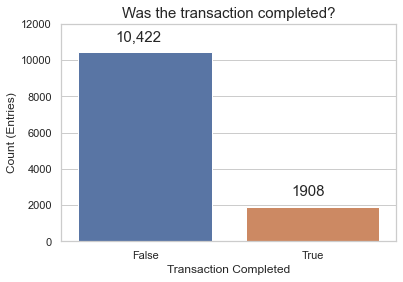

In [362]:
sns.countplot(mydata['Revenue'])
plt.ylim(0,12000)
plt.title('Was the transaction completed?', fontsize= 15)
plt.xlabel('Transaction Completed', fontsize=12)
plt.ylabel('Count (Entries)', fontsize=12)
plt.text(x=-.175, y=11000 ,s='10,422', fontsize=15)
plt.text(x=.875, y=2500, s='1908', fontsize=15)
plt.show()

In [363]:
mydata.Administrative_Duration.value_counts()

0.000000      5903
4.000000        56
5.000000        53
7.000000        45
11.000000       42
              ... 
294.070513       1
90.875000        1
97.333333        1
53.166667        1
247.083333       1
Name: Administrative_Duration, Length: 3335, dtype: int64

In [364]:
mydata.Administrative.value_counts()

0     5768
1     1354
2     1114
3      915
4      765
5      575
6      432
7      338
8      287
9      225
10     153
11     105
12      86
13      56
14      44
15      38
16      24
17      16
18      12
19       6
24       4
22       4
23       3
20       2
21       2
26       1
27       1
Name: Administrative, dtype: int64

In [365]:
mydata.Administrative.unique()

array([ 0,  1,  2,  4, 12,  3, 10,  6,  5,  9,  8, 16, 13, 11,  7, 18, 14,
       17, 19, 15, 24, 22, 21, 20, 23, 27, 26])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


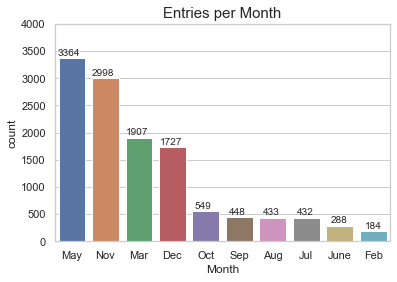

In [5]:
monthly = mydata['Month'].value_counts()

sns.countplot(mydata['Month'], order=monthly.index)
plt.title('Entries per Month', fontsize=15)
xval = -.42
plt.ylim(0,4000)

for index, value in monthly.items():
    plt.text(x=xval, y=value+50, s=str(value))
    xval += 1.02

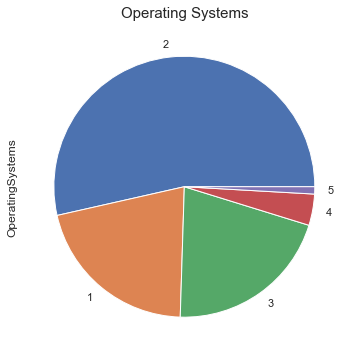

In [367]:
mydata['OperatingSystems'] = mydata['OperatingSystems'].replace([5,6,7,8],5)
os_plot = mydata['OperatingSystems'].value_counts().plot.pie(figsize=(6,6))
plt.title('Operating Systems', fontsize=15)
plt.show()

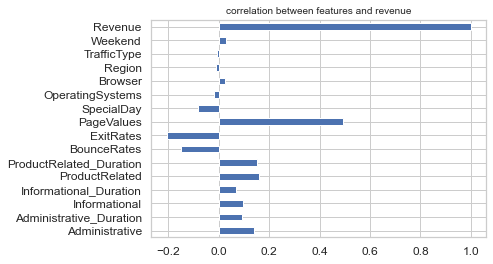

In [368]:
mydata.corr()['Revenue'].plot(kind='barh', fontsize=12);
plt.title('correlation between features and revenue', fontsize=10);

<AxesSubplot:xlabel='VisitorType', ylabel='Revenue'>

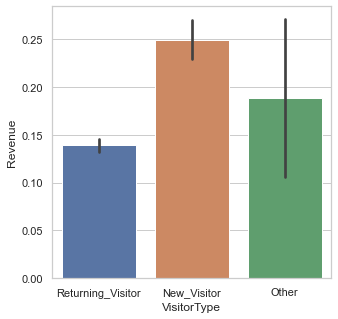

In [369]:
plt.figure(figsize=(5, 5))
sns.barplot(data = mydata, y="Revenue", x="VisitorType")

Text(0, 0.5, 'Frequency')

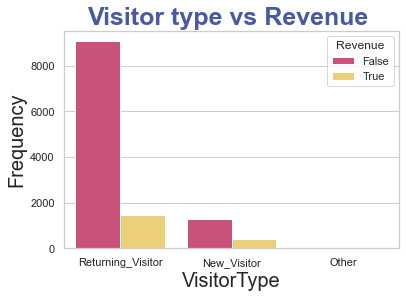

In [370]:
sns.countplot(data=mydata, x="VisitorType", hue="Revenue" , palette=['#db3f72', '#ffd966', '#485aa3','#edad7b']);
plt.title('Visitor type vs Revenue ', fontsize=25, fontweight='bold', color='#485aa3')
plt.xlabel('VisitorType',size=20)
plt.ylabel('Frequency',size=20)
#plt.savefig('Platforms Content for Each Age  .png',transparent=True)

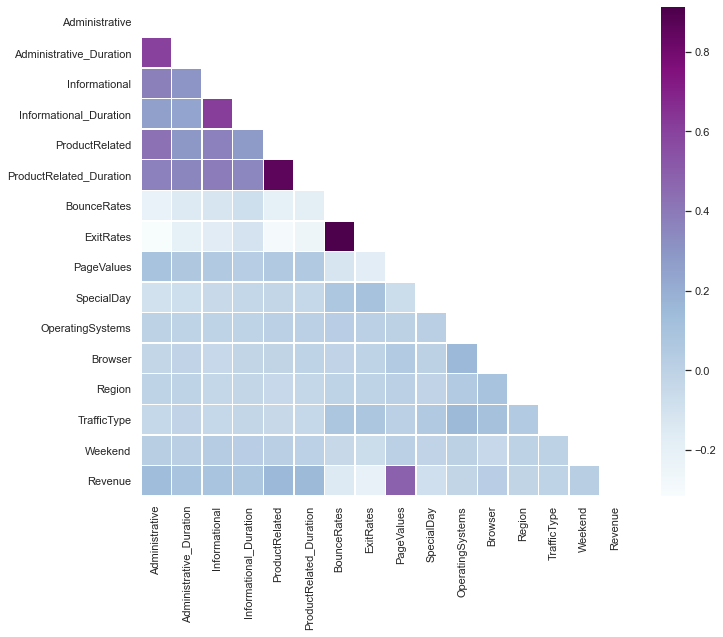

In [371]:
corr_all = mydata.corr()
mask = np.zeros_like(corr_all,dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
 
f,ax = plt.subplots(figsize=(11,9))
sns.heatmap(corr_all,mask=mask,square=True,linewidths=.5,ax=ax,cmap="BuPu")
plt.show()

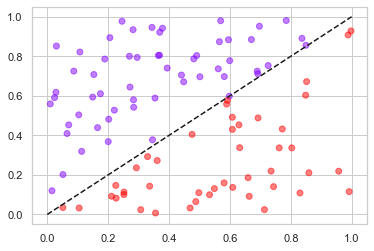

In [372]:
X = np.random.rand(100, 2)
y1 = [1 if i[0]>i[1] else 0 for i in X]

import matplotlib.cm as cm


def visualize(X, y, bdry='diag'):
    c = cm.rainbow(np.linspace(0, 1, 2))
    plt.scatter([i[0] for i in X], [i[1] for i in X], color=[c[i] for i in y], alpha=.5)
    
    #Plot the true decision boundary
    if bdry == 'diag':
        plt.plot([0, 1], [0, 1], 'k--')
    elif bdry == 'quadrant':
        plt.plot([0, 1], [0.5, 0.5], 'k--')
        plt.plot([0.5, 0.5], [0, 1], 'k--')
        
    plt.grid(True)
    

visualize(X, y1)



# <a name='Test'>Test</a>

In [373]:
from sklearn.model_selection import train_test_split

def quick_test(model, X, y):
    xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3)
    model.fit(xtrain, ytrain)
    return model.score(xtest, ytest)

def quick_test_afew_times(model, X, y, n=10):
    return np.mean([quick_test(model, X, y) for j in range(n)])

In [374]:
logreg = LogisticRegression(penalty='none')

# Do the test 10 times with (unregularized) Logistic Regression and get the average score
quick_test_afew_times(logreg, X, y1)

0.9866666666666667

In [375]:
decisiontree = DecisionTreeClassifier(max_depth=4)
quick_test_afew_times(decisiontree, X, y1)

0.8866666666666667

In [376]:
randomforest = RandomForestClassifier(n_estimators=100)
quick_test_afew_times(randomforest, X, y1)

0.9200000000000002

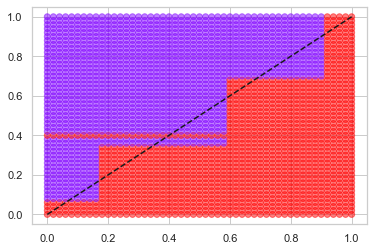

In [377]:
decisiontree.fit(X, y1)

grid = np.mgrid[0:1.02:0.02, 0:1.02:0.02].reshape(2,-1).T
visualize(grid, decisiontree.predict(grid))

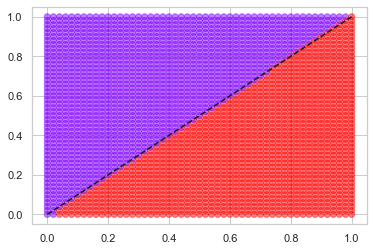

In [36]:
logreg.fit(X, y1)

grid = np.mgrid[0:1.02:0.02, 0:1.02:0.02].reshape(2,-1).T
visualize(grid, logreg.predict(grid))

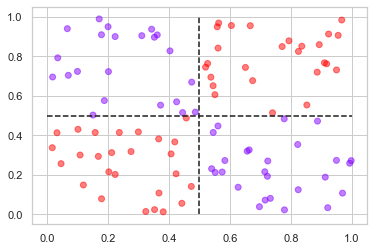

In [37]:
y2 = [1 if (0.5-i[0])*(0.5-i[1])>0 else 0 for i in X]
visualize(X, y2, bdry='quadrant')

In [38]:
logreg = LogisticRegression()
quick_test_afew_times(logreg, X, y2)

0.45

In [39]:
decisiontree = DecisionTreeClassifier()
quick_test_afew_times(decisiontree, X, y2)

0.9100000000000001

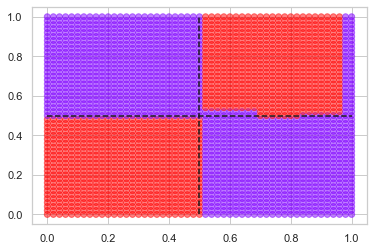

In [40]:
decisiontree.fit(X, y2)

grid = np.mgrid[0:1.02:0.02, 0:1.02:0.02].reshape(2,-1).T
visualize(grid, decisiontree.predict(grid), bdry='quadrant')

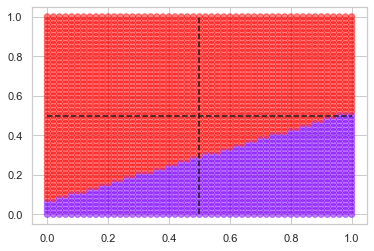

In [41]:
logreg.fit(X, y2)

grid = np.mgrid[0:1.02:0.02, 0:1.02:0.02].reshape(2,-1).T
visualize(grid, logreg.predict(grid), bdry='quadrant')

# <a name= 'Spliting'> Splitting The Data </a>


In [6]:
X = mydata.drop("Revenue", axis = 1) 
Y= mydata['Revenue']

In [7]:
smaller_df = X.select_dtypes(include=np.number).columns

In [8]:
smaller_df

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType'],
      dtype='object')

In [9]:
X= pd.get_dummies(X)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state=42)

In [11]:
def make_confusion_matrix(model, threshold=0.3):
    y_predict = (model.predict_proba(X_test_std)[:, 1] >= threshold)
    fraud_confusion = confusion_matrix(y_test, y_predict)
    plt.figure(dpi=80)
    sns.heatmap(fraud_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['', ''],
           yticklabels=['', '']);
    plt.xlabel('prediction')
    plt.ylabel('actual')

# <a name = 'Baseline'> Baseline Model </a> 


In [12]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression(max_iter=10000)
lr.fit(X_train[smaller_df],y_train) #numirecal value
print(lr.score(X_train[smaller_df] , y_train))
print(lr.score(X_test[smaller_df] ,y_test))  

0.8848337388483374
0.8686131386861314


In [13]:
#Logistic Regression for Dummies
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression(max_iter=10000)
lr.fit(X_train,y_train)
#lr.score(X_train,y_train)
print(lr.score(X_train, y_train))
print(lr.score(X_test,y_test)) 

0.8857461476074615
0.8710462287104623



 # <a name = 'ClassImbalance'> Class Imbalance </a> 

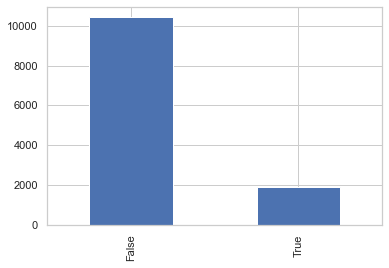

In [14]:
mydata['Revenue'].value_counts().plot.bar();

In [15]:
counts = mydata.Revenue.value_counts()
not_stable = counts[1]
stable = counts[0]
perc_not_stable = (not_stable/(not_stable+stable))*100
perc_stable = (stable/(not_stable+stable))*100
print('There were {} stable customer ({:.3f}%) and {} not stable customer ({:.3f}%).'.format(not_stable, perc_not_stable, stable, perc_stable))

There were 1908 stable customer (15.474%) and 10422 not stable customer (84.526%).


In [16]:
ss = StandardScaler()
X_train_std = ss.fit_transform(X_train)
X_test_std = ss.transform(X_test)


 # <a name = 'UnderSampling'> Under Sampling </a> 

In [17]:
#exper whith random under sampling
from imblearn.under_sampling import RandomUnderSampler 
model3 = LogisticRegression(C=1.1000000000003)
RUS = RandomUnderSampler(random_state=42)
X_tr_us, y_tr_us = RUS.fit_resample(X_train_std, y_train)
model3.fit(X_tr_us, y_tr_us)
print("train:",model3.score(X_tr_us, y_tr_us))
print("test:",model3.score(X_test_std, y_test))


train: 0.8162992651970608
test: 0.8471208434712084


In [18]:
y_predict = model3.predict(X_test_std)
print("Default threshold:")
print("Precision: {:6.4f} \nRecall: {:6.4f}".format(precision_score(y_test, y_predict), 
                                                     recall_score(y_test, y_predict)))
print("F-1 score: ", f1_score(y_test, y_predict))
print("Accuracy score: ", accuracy_score(y_test , y_predict))

Default threshold:
Precision: 0.5289 
Recall: 0.7567
F-1 score:  0.6226226226226226
Accuracy score:  0.8471208434712084


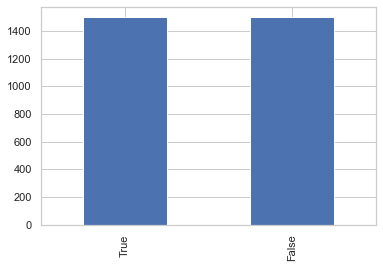

In [19]:
pd.Series( y_tr_us).value_counts().plot.bar();

 # <a name = 'OverSampling'> Over Sampling </a> 

In [20]:
from imblearn.over_sampling import RandomOverSampler 
#exper whith random over sampling
model4 = LogisticRegression(C=1.1000000000003)
# randomly oversample positive samples
ROS = RandomOverSampler(random_state=42)
X_tr_rs, y_tr_rs = ROS.fit_resample(X_train_std, y_train)
model4.fit(X_tr_rs, y_tr_rs)
print("train:",model4.score(X_tr_rs, y_tr_rs))
print("test:",model4.score(X_test_std, y_test))


train: 0.8191107923987092
test: 0.8536090835360909


In [21]:
y_predict = model4.predict(X_test_std)
print("Default threshold:")
print("Precision: {:6.4f} \nRecall: {:6.4f}".format(precision_score(y_test, y_predict), 
                                                     recall_score(y_test, y_predict)))
print("F-1 score: ", f1_score(y_test, y_predict))
print("Accuracy score: ", accuracy_score(y_test , y_predict))

Default threshold:
Precision: 0.5448 
Recall: 0.7397
F-1 score:  0.6274509803921569
Accuracy score:  0.8536090835360909


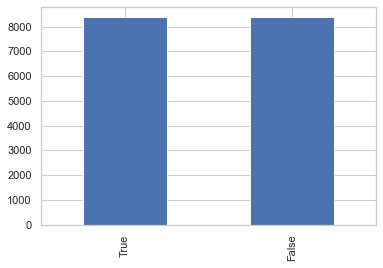

In [22]:
pd.Series(y_tr_rs).value_counts().plot.bar();


 # <a name = 'SMOTE'> SMOTE </a> 

In [23]:

#exper whith smote
model2 = LogisticRegression(C=1.1000000000003)
SMT = SMOTE(random_state=42)
X_tr_smt, y_tr_smt = SMT.fit_resample(X_train_std, y_train)
model2.fit(X_tr_smt, y_tr_smt)
print("train:",model2.score(X_tr_smt, y_tr_smt))
print("test:",model2.score(X_test_std, y_test))


train: 0.8357236763475558
test: 0.8613138686131386


In [24]:
y_predict = model4.predict(X_test_std)
print("Default threshold:")
print("Precision: {:6.4f} \nRecall: {:6.4f}".format(precision_score(y_test, y_predict), 
                                                     recall_score(y_test, y_predict)))
print("F-1 score: ", f1_score(y_test, y_predict))
print("Accuracy score: ", accuracy_score(y_test , y_predict))

Default threshold:
Precision: 0.5448 
Recall: 0.7397
F-1 score:  0.6274509803921569
Accuracy score:  0.8536090835360909


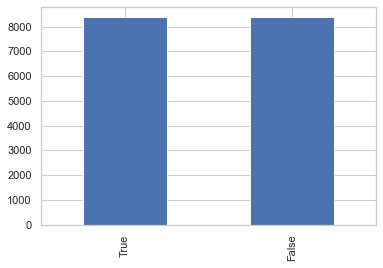

In [25]:
pd.Series(y_tr_smt).value_counts().plot.bar();


 # <a name = 'StandardScaler'> Standard Scaler </a> 

In [26]:
# Expr2: with scaling (standard scaler or minmax scaler)
ss = StandardScaler()

X_train_std = ss.fit_transform(X_train)
X_test_std = ss.transform(X_test)

# Modeling
model = LogisticRegression()
model.fit(X_train_std, y_train)
print(model.score(X_train_std, y_train))
print(model.score(X_test_std, y_test))

0.8880778588807786
0.8730738037307381


In [27]:
y_predict = model.predict(X_test_std)
print("Default threshold:")
print("Precision: {:6.4f} \nRecall: {:6.4f}".format(precision_score(y_test, y_predict), 
                                                     recall_score(y_test, y_predict)))
print("F-1 score: ", f1_score(y_test, y_predict))
print("Accuracy score: ", accuracy_score(y_test , y_predict))

Default threshold:
Precision: 0.7552 
Recall: 0.3528
F-1 score:  0.4809286898839138
Accuracy score:  0.8730738037307381


In [28]:
# Expr2: with scaling (standard scaler or minmax scaler)
mm = MinMaxScaler()

X_train_mm = mm.fit_transform(X_train)
X_test_mm = mm.transform(X_test)

# Modeling
modelm = LogisticRegression()
modelm.fit(X_train_mm, y_train)
print(modelm.score(X_train_mm, y_train))
print(modelm.score(X_test_mm, y_test))

0.8803730738037308
0.864963503649635


In [29]:
y_predict = model.predict(X_test_mm)
print("Default threshold:")
print("Precision: {:6.4f} \nRecall: {:6.4f}".format(precision_score(y_test, y_predict), 
                                                     recall_score(y_test, y_predict)))
print("F-1 score: ", f1_score(y_test, y_predict))
print("Accuracy score: ", accuracy_score(y_test , y_predict))

Default threshold:
Precision: 0.0000 
Recall: 0.0000
F-1 score:  0.0
Accuracy score:  0.8333333333333334


/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



 # <a name = 'LogisticRegression'> Logistic Regression </a> 

In [30]:
lr_999 =LogisticRegression(max_iter=10000)
lr_999.fit(X_tr_us, y_tr_us)

print( f'Train score: {lr_999.score(X_tr_us, y_tr_us)}')
print( f'Test score:  {lr_999.score(X_test_std, y_test)}')


y_predict = lr_999.predict(X_test_std)
print("Default threshold:")
print("Precision: {:6.4f} \nRecall: {:6.4f}".format(precision_score(y_test, y_predict), 
                                                     recall_score(y_test, y_predict)))
print("F-1 score: ", f1_score(y_test, y_predict))
print("Accuracy score: ", accuracy_score(y_test , y_predict))

Train score: 0.8162992651970608
Test score:  0.8471208434712084
Default threshold:
Precision: 0.5289 
Recall: 0.7567
F-1 score:  0.6226226226226226
Accuracy score:  0.8471208434712084


In [31]:
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
lr_2=LogisticRegression(max_iter=10000)


ROS = RandomOverSampler(random_state=42)

pipeline = Pipeline([('ros', ROS), ('log', lr_2)])

prams ={"log__penalty": [ 'l1', 'l2'],
       "log__C": [0.5 , 0.7,0.8 , 1.0 , 2.0 , 3.0]}


gcv= GridSearchCV(pipeline, prams, cv = skf, verbose=10 )
gcv.fit(X_train, y_train)


Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV 1/3; 1/12] START log__C=0.5, log__penalty=l1................................
[CV 1/3; 1/12] END ...log__C=0.5, log__penalty=l1;, score=nan total time=   0.0s
[CV 2/3; 1/12] START log__C=0.5, log__penalty=l1................................
[CV 2/3; 1/12] END ...log__C=0.5, log__penalty=l1;, score=nan total time=   0.0s
[CV 3/3; 1/12] START log__C=0.5, log__penalty=l1................................
[CV 3/3; 1/12] END ...log__C=0.5, log__penalty=l1;, score=nan total time=   0.0s
[CV 1/3; 2/12] START log__C=0.5, log__penalty=l2................................


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/imblearn/pipeline.py", line 266, in fit
    self._final_estimator.fit(Xt, yt, **fit_params_last_step)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, go

[CV 1/3; 2/12] END .log__C=0.5, log__penalty=l2;, score=0.865 total time=   1.5s
[CV 2/3; 2/12] START log__C=0.5, log__penalty=l2................................
[CV 2/3; 2/12] END .log__C=0.5, log__penalty=l2;, score=0.863 total time=   2.1s
[CV 3/3; 2/12] START log__C=0.5, log__penalty=l2................................
[CV 3/3; 2/12] END .log__C=0.5, log__penalty=l2;, score=0.863 total time=   1.6s
[CV 1/3; 3/12] START log__C=0.7, log__penalty=l1................................
[CV 1/3; 3/12] END ...log__C=0.7, log__penalty=l1;, score=nan total time=   0.0s
[CV 2/3; 3/12] START log__C=0.7, log__penalty=l1................................
[CV 2/3; 3/12] END ...log__C=0.7, log__penalty=l1;, score=nan total time=   0.0s
[CV 3/3; 3/12] START log__C=0.7, log__penalty=l1................................
[CV 3/3; 3/12] END ...log__C=0.7, log__penalty=l1;, score=nan total time=   0.0s
[CV 1/3; 4/12] START log__C=0.7, log__penalty=l2................................


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/imblearn/pipeline.py", line 266, in fit
    self._final_estimator.fit(Xt, yt, **fit_params_last_step)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, go

[CV 1/3; 4/12] END .log__C=0.7, log__penalty=l2;, score=0.855 total time=   4.1s
[CV 2/3; 4/12] START log__C=0.7, log__penalty=l2................................
[CV 2/3; 4/12] END .log__C=0.7, log__penalty=l2;, score=0.866 total time=   2.5s
[CV 3/3; 4/12] START log__C=0.7, log__penalty=l2................................
[CV 3/3; 4/12] END .log__C=0.7, log__penalty=l2;, score=0.865 total time=   1.8s
[CV 1/3; 5/12] START log__C=0.8, log__penalty=l1................................
[CV 1/3; 5/12] END ...log__C=0.8, log__penalty=l1;, score=nan total time=   0.1s
[CV 2/3; 5/12] START log__C=0.8, log__penalty=l1................................
[CV 2/3; 5/12] END ...log__C=0.8, log__penalty=l1;, score=nan total time=   0.0s
[CV 3/3; 5/12] START log__C=0.8, log__penalty=l1................................
[CV 3/3; 5/12] END ...log__C=0.8, log__penalty=l1;, score=nan total time=   0.0s
[CV 1/3; 6/12] START log__C=0.8, log__penalty=l2................................


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/imblearn/pipeline.py", line 266, in fit
    self._final_estimator.fit(Xt, yt, **fit_params_last_step)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, go

[CV 1/3; 6/12] END .log__C=0.8, log__penalty=l2;, score=0.860 total time=   2.4s
[CV 2/3; 6/12] START log__C=0.8, log__penalty=l2................................
[CV 2/3; 6/12] END .log__C=0.8, log__penalty=l2;, score=0.860 total time=   3.3s
[CV 3/3; 6/12] START log__C=0.8, log__penalty=l2................................
[CV 3/3; 6/12] END .log__C=0.8, log__penalty=l2;, score=0.855 total time=   2.4s
[CV 1/3; 7/12] START log__C=1.0, log__penalty=l1................................
[CV 1/3; 7/12] END ...log__C=1.0, log__penalty=l1;, score=nan total time=   0.0s
[CV 2/3; 7/12] START log__C=1.0, log__penalty=l1................................
[CV 2/3; 7/12] END ...log__C=1.0, log__penalty=l1;, score=nan total time=   0.0s
[CV 3/3; 7/12] START log__C=1.0, log__penalty=l1................................
[CV 3/3; 7/12] END ...log__C=1.0, log__penalty=l1;, score=nan total time=   0.0s
[CV 1/3; 8/12] START log__C=1.0, log__penalty=l2................................


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/imblearn/pipeline.py", line 266, in fit
    self._final_estimator.fit(Xt, yt, **fit_params_last_step)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, go

[CV 1/3; 8/12] END .log__C=1.0, log__penalty=l2;, score=0.860 total time=   4.6s
[CV 2/3; 8/12] START log__C=1.0, log__penalty=l2................................
[CV 2/3; 8/12] END .log__C=1.0, log__penalty=l2;, score=0.860 total time=   2.7s
[CV 3/3; 8/12] START log__C=1.0, log__penalty=l2................................
[CV 3/3; 8/12] END .log__C=1.0, log__penalty=l2;, score=0.860 total time=   1.8s
[CV 1/3; 9/12] START log__C=2.0, log__penalty=l1................................
[CV 1/3; 9/12] END ...log__C=2.0, log__penalty=l1;, score=nan total time=   0.0s
[CV 2/3; 9/12] START log__C=2.0, log__penalty=l1................................
[CV 2/3; 9/12] END ...log__C=2.0, log__penalty=l1;, score=nan total time=   0.0s
[CV 3/3; 9/12] START log__C=2.0, log__penalty=l1................................
[CV 3/3; 9/12] END ...log__C=2.0, log__penalty=l1;, score=nan total time=   0.0s
[CV 1/3; 10/12] START log__C=2.0, log__penalty=l2...............................


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/imblearn/pipeline.py", line 266, in fit
    self._final_estimator.fit(Xt, yt, **fit_params_last_step)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, go

[CV 1/3; 10/12] END log__C=2.0, log__penalty=l2;, score=0.863 total time=   1.9s
[CV 2/3; 10/12] START log__C=2.0, log__penalty=l2...............................
[CV 2/3; 10/12] END log__C=2.0, log__penalty=l2;, score=0.867 total time=   2.7s
[CV 3/3; 10/12] START log__C=2.0, log__penalty=l2...............................
[CV 3/3; 10/12] END log__C=2.0, log__penalty=l2;, score=0.866 total time=   1.5s
[CV 1/3; 11/12] START log__C=3.0, log__penalty=l1...............................
[CV 1/3; 11/12] END ..log__C=3.0, log__penalty=l1;, score=nan total time=   0.0s
[CV 2/3; 11/12] START log__C=3.0, log__penalty=l1...............................
[CV 2/3; 11/12] END ..log__C=3.0, log__penalty=l1;, score=nan total time=   0.0s
[CV 3/3; 11/12] START log__C=3.0, log__penalty=l1...............................
[CV 3/3; 11/12] END ..log__C=3.0, log__penalty=l1;, score=nan total time=   0.0s
[CV 1/3; 12/12] START log__C=3.0, log__penalty=l2...............................


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/imblearn/pipeline.py", line 266, in fit
    self._final_estimator.fit(Xt, yt, **fit_params_last_step)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, go

[CV 1/3; 12/12] END log__C=3.0, log__penalty=l2;, score=0.859 total time=   5.0s
[CV 2/3; 12/12] START log__C=3.0, log__penalty=l2...............................
[CV 2/3; 12/12] END log__C=3.0, log__penalty=l2;, score=0.860 total time=   3.7s
[CV 3/3; 12/12] START log__C=3.0, log__penalty=l2...............................
[CV 3/3; 12/12] END log__C=3.0, log__penalty=l2;, score=0.855 total time=   4.1s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan 0.8635442         nan 0.86192214        nan 0.85827251
        nan 0.86009732        nan 0.86516626        nan 0.85817113]


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('ros',
                                        RandomOverSampler(random_state=42)),
                                       ('log',
                                        LogisticRegression(max_iter=10000))]),
             param_grid={'log__C': [0.5, 0.7, 0.8, 1.0, 2.0, 3.0],
                         'log__penalty': ['l1', 'l2']},
             verbose=10)

In [40]:
gcv.best_score_

0.8651662611516627

In [41]:
gcv.best_params_

{'log__C': 2.0, 'log__penalty': 'l2'}

In [42]:
gcv.best_estimator_

Pipeline(steps=[('ros', RandomOverSampler(random_state=42)),
                ('log', LogisticRegression(C=2.0, max_iter=10000))])

In [43]:
tuned_lr = gcv.best_estimator_

In [44]:
y_predict = tuned_lr.predict(X_test)
print("Default threshold:")
print("Precision: {:6.4f} \nRecall: {:6.4f}".format(precision_score(y_test, y_predict), 
                                                     recall_score(y_test, y_predict)))


print("F-1 score: ", f1_score(y_test, y_predict))
print("Accuracy score: ", accuracy_score(y_test , y_predict))

Default threshold:
Precision: 0.5674 
Recall: 0.7372
F-1 score:  0.6412698412698413
Accuracy score:  0.8625304136253041


In [45]:
# Let's see how our confusion matrix changes with changes to the cutoff! 

from ipywidgets import interactive, FloatSlider

interactive(lambda threshold: make_confusion_matrix(tuned_lr, threshold), threshold=(0.0,1.0,0.02))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.02), Output()), _dom_cla…


 # <a name = 'DecisionTree'> Decision Tree </a> 

In [46]:
decisiontree = DecisionTreeClassifier()
decisiontree.fit(X_tr_us, y_tr_us)
print(f'Train score: {decisiontree.score(X_tr_us, y_tr_us)}')
print(f'Test score: {decisiontree.score(X_test_std, y_test)}')


y_predict = decisiontree.predict(X_test_std)
print("Default threshold:")
print("Precision: {:6.4f} \nRecall: {:6.4f}".format(precision_score(y_test, y_predict), 
                                                     recall_score(y_test, y_predict)))
print("F-1 score: ", f1_score(y_test, y_predict))
print("Accuracy score: ", accuracy_score(y_test , y_predict))

Train score: 1.0
Test score: 0.7879156528791565
Default threshold:
Precision: 0.4259 
Recall: 0.7835
F-1 score:  0.5518423307626392
Accuracy score:  0.7879156528791565


In [47]:
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

dt = DecisionTreeClassifier()
ROS = RandomOverSampler(random_state=42)


DecisionTree = Pipeline([('ros', ROS ), ('log', dt)])


prams ={ 'log__max_depth'  : [3 ,5, 7,8, 11, 12],
       'log__min_samples_split' : [2, 3, 5, 9] , 'log__criterion' : ['gini', 'entropy'] }

dcv= GridSearchCV(DecisionTree, prams, cv = skf, verbose=10 )
dcv.fit(X_train, y_train)


Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV 1/3; 1/48] START log__criterion=gini, log__max_depth=3, log__min_samples_split=2
[CV 1/3; 1/48] END log__criterion=gini, log__max_depth=3, log__min_samples_split=2;, score=0.834 total time=   0.1s
[CV 2/3; 1/48] START log__criterion=gini, log__max_depth=3, log__min_samples_split=2
[CV 2/3; 1/48] END log__criterion=gini, log__max_depth=3, log__min_samples_split=2;, score=0.838 total time=   0.1s
[CV 3/3; 1/48] START log__criterion=gini, log__max_depth=3, log__min_samples_split=2
[CV 3/3; 1/48] END log__criterion=gini, log__max_depth=3, log__min_samples_split=2;, score=0.836 total time=   0.1s
[CV 1/3; 2/48] START log__criterion=gini, log__max_depth=3, log__min_samples_split=3
[CV 1/3; 2/48] END log__criterion=gini, log__max_depth=3, log__min_samples_split=3;, score=0.834 total time=   0.1s
[CV 2/3; 2/48] START log__criterion=gini, log__max_depth=3, log__min_samples_split=3
[CV 2/3; 2/48] END log__criterion=gini, log__max_

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('ros',
                                        RandomOverSampler(random_state=42)),
                                       ('log', DecisionTreeClassifier())]),
             param_grid={'log__criterion': ['gini', 'entropy'],
                         'log__max_depth': [3, 5, 7, 8, 11, 12],
                         'log__min_samples_split': [2, 3, 5, 9]},
             verbose=10)

In [48]:
## get cross validated train score & best parameters
print(dcv.best_score_)
print(dcv.best_params_)

0.8505677210056772
{'log__criterion': 'entropy', 'log__max_depth': 12, 'log__min_samples_split': 3}


In [49]:
## saved tuned model for future use 
tuned_dt = dcv.best_estimator_

In [50]:
y_predict = tuned_dt.predict(X_test_std)
print("Default threshold:")
print("Precision: {:6.4f} \nRecall: {:6.4f}".format(precision_score(y_test, y_predict), 
                                                     recall_score(y_test, y_predict)))
print("F-1 score: ", f1_score(y_test, y_predict))
print("Accuracy score: ", accuracy_score(y_test , y_predict))

Default threshold:
Precision: 0.4336 
Recall: 0.8029
F-1 score:  0.5631399317406143
Accuracy score:  0.7923763179237632


In [51]:
# Let's see how our confusion matrix changes with changes to the cutoff! 

from ipywidgets import interactive, FloatSlider

interactive(lambda threshold: make_confusion_matrix(tuned_dt, threshold), threshold=(0.0,1.0,0.02))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.02), Output()), _dom_cla…

Text(0.5, 1.0, 'Precision and Recall Curves')

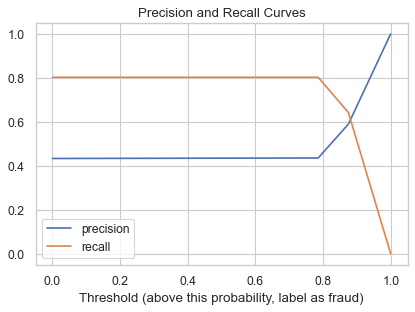

In [52]:

# We can also use the probabilities to make a curve showing us how recall 
# and thresholds trade off 

precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, tuned_dt.predict_proba(X_test_std)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as fraud)');
plt.title('Precision and Recall Curves')


 # <a name = 'RandomForest'> Random Forest </a> 

In [53]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
rf1=RandomForestClassifier()

#Train the model using the training sets y_pred=clf.predict(X_test)
rf1.fit(X_tr_us, y_tr_us)
print(f'Train score: {rf1.score(X_tr_us, y_tr_us)}')
print(f'Test score: {rf1.score(X_test_std, y_test)}')

y_predict = rf1.predict(X_test_std)
print("Default threshold:")
print("Precision: {:6.4f} \nRecall: {:6.4f}".format(precision_score(y_test, y_predict), 
                                                     recall_score(y_test, y_predict)))
print("F-1 score: ", f1_score(y_test, y_predict))
print("Accuracy score: ", accuracy_score(y_test , y_predict))


Train score: 1.0
Test score: 0.8527980535279805
Default threshold:
Precision: 0.5365 
Recall: 0.8589
F-1 score:  0.6604303086997193
Accuracy score:  0.8527980535279805


In [54]:
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

rf=RandomForestClassifier()

ROS = RandomOverSampler(random_state=42)

pipeline = Pipeline([('ros', ROS), ('log', rf)])

prams ={'log__max_depth'  : [3 ,5, 7,8, 11, 12 ], 'log__n_estimators' : [10, 20, 40, 50, 70],
       'log__min_samples_split' : [2, 3, 5, 9] ,  'log__max_features' : ['auto', 'sqrt', 'log2'],'log__criterion' : ['gini', 'entropy'] }


rf_cv= GridSearchCV(pipeline, prams, cv = skf, verbose=10 )
rf_cv.fit(X_train, y_train)

Fitting 3 folds for each of 720 candidates, totalling 2160 fits
[CV 1/3; 1/720] START log__criterion=gini, log__max_depth=3, log__max_features=auto, log__min_samples_split=2, log__n_estimators=10
[CV 1/3; 1/720] END log__criterion=gini, log__max_depth=3, log__max_features=auto, log__min_samples_split=2, log__n_estimators=10;, score=0.873 total time=   0.1s
[CV 2/3; 1/720] START log__criterion=gini, log__max_depth=3, log__max_features=auto, log__min_samples_split=2, log__n_estimators=10
[CV 2/3; 1/720] END log__criterion=gini, log__max_depth=3, log__max_features=auto, log__min_samples_split=2, log__n_estimators=10;, score=0.837 total time=   0.1s
[CV 3/3; 1/720] START log__criterion=gini, log__max_depth=3, log__max_features=auto, log__min_samples_split=2, log__n_estimators=10
[CV 3/3; 1/720] END log__criterion=gini, log__max_depth=3, log__max_features=auto, log__min_samples_split=2, log__n_estimators=10;, score=0.849 total time=   0.1s
[CV 1/3; 2/720] START log__criterion=gini, log__max

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('ros',
                                        RandomOverSampler(random_state=42)),
                                       ('log', RandomForestClassifier())]),
             param_grid={'log__criterion': ['gini', 'entropy'],
                         'log__max_depth': [3, 5, 7, 8, 11, 12],
                         'log__max_features': ['auto', 'sqrt', 'log2'],
                         'log__min_samples_split': [2, 3, 5, 9],
                         'log__n_estimators': [10, 20, 40, 50, 70]},
             verbose=10)

In [55]:
rf_cv.best_params_
rf_cv.best_estimator_

Pipeline(steps=[('ros', RandomOverSampler(random_state=42)),
                ('log', RandomForestClassifier(max_depth=12, n_estimators=50))])

In [56]:
rf_final = rf_cv.best_estimator_

In [57]:
y_predict = rf_final.predict(X_test)
print("Default threshold:")
print("Precision: {:6.4f} \nRecall: {:6.4f}".format(precision_score(y_test, y_predict), 
                                                     recall_score(y_test, y_predict)))
print("F-1 score: ", f1_score(y_test, y_predict))
print("Accuracy score: ", accuracy_score(y_test , y_predict))

Default threshold:
Precision: 0.6026 
Recall: 0.7932
F-1 score:  0.6848739495798319
Accuracy score:  0.878345498783455


In [58]:
# Let's see how our confusion matrix changes with changes to the cutoff! 

from ipywidgets import interactive, FloatSlider

interactive(lambda threshold: make_confusion_matrix(rf_final, threshold), threshold=(0.0,1.0,0.02))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.02), Output()), _dom_cla…

Text(0.5, 1.0, 'Precision and Recall Curves')

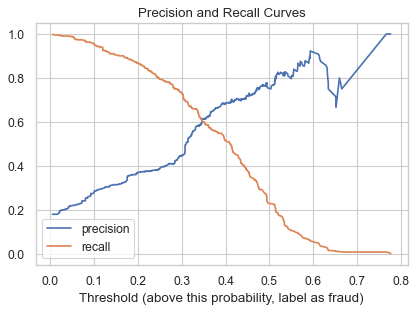

In [59]:
# We can also use the probabilities to make a curve showing us how recall 
# and thresholds trade off 

precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, rf_final.predict_proba(X_test_std)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as fraud)');
plt.title('Precision and Recall Curves')



 # <a name ='KNN'> KNN </a> 

In [60]:
Knn_model = KNeighborsClassifier()
Knn_model.fit(X_tr_us, y_tr_us)
print(f'Train : {Knn_model.score(X_tr_us, y_tr_us)}')
print(f'Test : {Knn_model.score(X_test ,y_test)}')


y_predict = Knn_model.predict(X_test_std)
print("Default threshold:")
print("Precision: {:6.4f} \nRecall: {:6.4f}".format(precision_score(y_test, y_predict), 
                                                     recall_score(y_test, y_predict)))
print("F-1 score: ", f1_score(y_test, y_predict))
print("Accuracy score: ", accuracy_score(y_test , y_predict))

Train : 0.8366733466933868
Test : 0.22384428223844283
Default threshold:
Precision: 0.3879 
Recall: 0.7324
F-1 score:  0.5071609098567819
Accuracy score:  0.7627737226277372


In [61]:
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold


skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

Knn_model = KNeighborsClassifier( n_neighbors=5)


ROS = RandomOverSampler(random_state=42)

pipeline = Pipeline([('ros', ROS), ('log',Knn_model )])

prams ={'log__n_neighbors':[3,7,9,11]}

kn_cv= GridSearchCV( pipeline  , prams, cv = skf, verbose=10 )
kn_cv.fit(X_train_std, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV 1/3; 1/4] START log__n_neighbors=3..........................................
[CV 1/3; 1/4] END ...........log__n_neighbors=3;, score=0.806 total time=   1.0s
[CV 2/3; 1/4] START log__n_neighbors=3..........................................
[CV 2/3; 1/4] END ...........log__n_neighbors=3;, score=0.810 total time=   0.7s
[CV 3/3; 1/4] START log__n_neighbors=3..........................................
[CV 3/3; 1/4] END ...........log__n_neighbors=3;, score=0.803 total time=   0.8s
[CV 1/3; 2/4] START log__n_neighbors=7..........................................
[CV 1/3; 2/4] END ...........log__n_neighbors=7;, score=0.762 total time=   0.7s
[CV 2/3; 2/4] START log__n_neighbors=7..........................................
[CV 2/3; 2/4] END ...........log__n_neighbors=7;, score=0.762 total time=   0.9s
[CV 3/3; 2/4] START log__n_neighbors=7..........................................
[CV 3/3; 2/4] END ...........log__n_neighbors=7;,

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('ros',
                                        RandomOverSampler(random_state=42)),
                                       ('log', KNeighborsClassifier())]),
             param_grid={'log__n_neighbors': [3, 7, 9, 11]}, verbose=10)

In [62]:
kn_cv.best_params_
kn_cv.best_estimator_

Pipeline(steps=[('ros', RandomOverSampler(random_state=42)),
                ('log', KNeighborsClassifier(n_neighbors=3))])

In [63]:
kn_final = kn_cv.best_estimator_

In [64]:
kn_final

Pipeline(steps=[('ros', RandomOverSampler(random_state=42)),
                ('log', KNeighborsClassifier(n_neighbors=3))])

In [65]:
y_predict = kn_final.predict(X_test_std)
print("Default threshold:")
print("Precision: {:6.4f} \nRecall: {:6.4f}".format(precision_score(y_test, y_predict), 
                                                     recall_score(y_test, y_predict)))
print("F-1 score: ", f1_score(y_test, y_predict))
print("Accuracy score: ", accuracy_score(y_test , y_predict))

Default threshold:
Precision: 0.4475 
Recall: 0.5596
F-1 score:  0.4972972972972974
Accuracy score:  0.8114355231143552


Text(0.5, 1.0, 'Precision and Recall Curves')

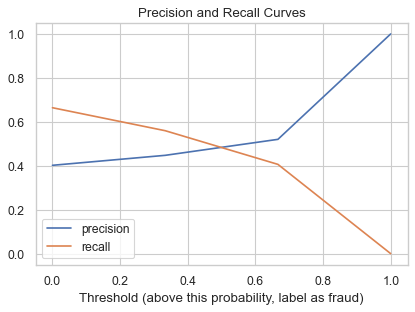

In [66]:
# We can also use the probabilities to make a curve showing us how recall 
# and thresholds trade off 

precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, kn_final.predict_proba(X_test_std)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as fraud)');
plt.title('Precision and Recall Curves')

In [67]:
# Let's see how our confusion matrix changes with changes to the cutoff! 

from ipywidgets import interactive, FloatSlider

interactive(lambda threshold: make_confusion_matrix(kn_final, threshold), threshold=(0.0,1.0,0.02))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.02), Output()), _dom_cla…


 # <a name = 'XGBoost'> XGBoost </a> 

In [75]:
gbm = xgb.XGBClassifier()
gbm.fit(X_tr_us, y_tr_us)
print(f'Train score: {gbm.score(X_tr_us, y_tr_us)}')
print(f'Test score: {gbm.score(X_test_std, y_test)}')

y_predict = gbm.predict(X_test_std)
print("Default threshold:")
print("Precision: {:6.4f} \nRecall: {:6.4f}".format(precision_score(y_test, y_predict), 
                                                     recall_score(y_test, y_predict)))
print("F-1 score: ", f1_score(y_test, y_predict))
print("Accuracy score: ", accuracy_score(y_test , y_predict))

Train score: 0.9993319973279893
Test score: 0.8357664233576643
Default threshold:
Precision: 0.5043 
Recall: 0.8540
F-1 score:  0.6341463414634146
Accuracy score:  0.8357664233576643


In [77]:
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

xgb_model = xgb.XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic')

ROS = RandomOverSampler(random_state=42)

pipeline = Pipeline([('ros', ROS), ('log',xgb_model)])

prams = {
        'log__min_child_weight': [1, 5, 10],
        'log__gamma': [0.5, 1, 1.5, 2, 5],
        'log__subsample': [0.6, 0.8, 1.0],
        'log__colsample_bytree': [0.6, 0.8, 1.0],
        'log__max_depth': [3, 4, 5]
        }
param_comb = 15
xgb_cv= RandomizedSearchCV(xgb_model, param_distributions=prams, n_iter=param_comb, scoring='accuracy', n_jobs=-1, cv=skf, verbose=3, random_state=42)
xgb_cv.fit(X_train, y_train)

Fitting 3 folds for each of 15 candidates, totalling 45 fits
[00:41:11] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/learner.cc:480: 
Parameters: { log__colsample_bytree, log__gamma, log__max_depth, log__min_child_weight, log__subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=0.02,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None,...
                                           reg_lambda=None,
                                           scale_pos_weight=None,
                                           subsample=None, tree_method=None,
                                           validate_parameters=No

In [78]:
print('Best score:')
print(xgb_cv.best_score_)

Best score:
0.9042984590429844


In [79]:
print('Best estimator:')
print(xgb_cv.best_estimator_)

Best estimator:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.02, log__colsample_bytree=0.6, log__gamma=1.5,
              log__max_depth=4, log__min_child_weight=10, log__subsample=0.8,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=600, n_jobs=0,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, ...)


In [80]:
tuned_xgb = xgb_cv.best_estimator_

In [81]:
tuned_xgb

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.02, log__colsample_bytree=0.6, log__gamma=1.5,
              log__max_depth=4, log__min_child_weight=10, log__subsample=0.8,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=600, n_jobs=0,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, ...)

In [82]:
y_predict = tuned_xgb.predict(X_test)
print("Default threshold:")
print("Precision: {:6.4f} \nRecall: {:6.4f}".format(precision_score(y_test, y_predict), 
                                                     recall_score(y_test, y_predict)))
print("F-1 score: ", f1_score(y_test, y_predict))
print("Accuracy score: ", accuracy_score(y_test , y_predict))

Default threshold:
Precision: 0.7315 
Recall: 0.5766
F-1 score:  0.6448979591836734
Accuracy score:  0.8941605839416058


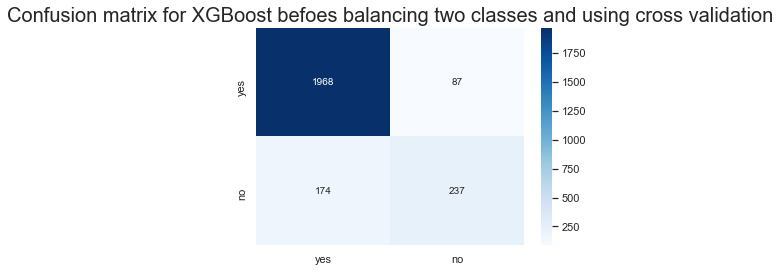

In [83]:
cm = confusion_matrix(y_test,  y_predict)
class_label = ["yes", "no"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d",  cmap = "Blues" )
plt.title('Confusion matrix for XGBoost befoes balancing two classes and using cross validation', fontsize = 20); # title with fontsize 20

Text(0.5, 1.0, 'Precision and Recall Curves')

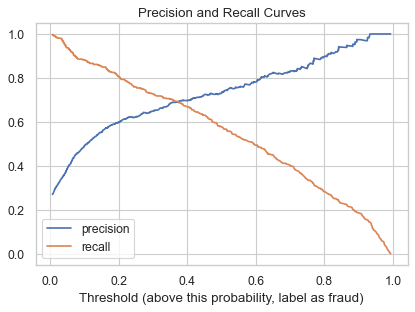

In [84]:
# We can also use the probabilities to make a curve showing us how recall 
# and thresholds trade off 

precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, tuned_xgb.predict_proba(X_test)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as fraud)');
plt.title('Precision and Recall Curves')



 # <a name = 'VotingClassifier'> Voting Classifier  </a> 

In [85]:
model_names = ["rf_final", "kn_final", "tuned_lr" ,"tuned_dt" ,"tuned_xgb" ]

model_vars = [eval(n) for n in model_names]
model_list = list(zip(model_names, model_vars))

In [86]:
model_list

[('rf_final',
  Pipeline(steps=[('ros', RandomOverSampler(random_state=42)),
                  ('log', RandomForestClassifier(max_depth=12, n_estimators=50))])),
 ('kn_final',
  Pipeline(steps=[('ros', RandomOverSampler(random_state=42)),
                  ('log', KNeighborsClassifier(n_neighbors=3))])),
 ('tuned_lr',
  Pipeline(steps=[('ros', RandomOverSampler(random_state=42)),
                  ('log', LogisticRegression(C=2.0, max_iter=10000))])),
 ('tuned_dt',
  Pipeline(steps=[('ros', RandomOverSampler(random_state=42)),
                  ('log',
                   DecisionTreeClassifier(criterion='entropy', max_depth=12,
                                          min_samples_split=3))])),
 ('tuned_xgb',
  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
                importance_type='gain', interaction_constraints='',
                learning_rate=0.02, log__colsample_bytree=0.6, log

In [87]:
# Get peek at individual test scores

print(f' Logreg Test score: {tuned_lr.score(X_test_std, y_test)}')
print(f' Random forest Test score: {rf_final.score(X_test_std, y_test)}')
print(f' KNN Test score: {kn_final.score(X_test, y_test)}') 
print(f' Decision Tree Test score: {tuned_dt.score(X_test_std, y_test)}')
print(f' XGB Test score: {tuned_xgb.score(X_test, y_test)}')



 Logreg Test score: 0.5717761557177615
 Random forest Test score: 0.8588807785888077
 KNN Test score: 0.8021086780210868
 Decision Tree Test score: 0.7923763179237632
 XGB Test score: 0.8941605839416058


In [88]:
from sklearn.ensemble import VotingClassifier
# create voting classifier
voting_classifer = VotingClassifier(estimators=model_list,
                                    voting='soft', 
                                    n_jobs=-1)
voting_classifer.fit(X_train, y_train)

VotingClassifier(estimators=[('rf_final',
                              Pipeline(steps=[('ros',
                                               RandomOverSampler(random_state=42)),
                                              ('log',
                                               RandomForestClassifier(max_depth=12,
                                                                      n_estimators=50))])),
                             ('kn_final',
                              Pipeline(steps=[('ros',
                                               RandomOverSampler(random_state=42)),
                                              ('log',
                                               KNeighborsClassifier(n_neighbors=3))])),
                             ('tuned_lr',
                              Pipeline(steps=[('ros',
                                               RandomOverSampler(random_state=42...
                                            log__gamma=1.5, log__max_depth=4,
          

In [89]:
# Get accuracy (model to beat: logreg with 0.8324 accuracy)
y_pred = voting_classifer.predict(X_test)
accuracy_score(y_test, y_pred)

0.878345498783455


 # <a name = 'MaxVoting'> Max voting </a> 

In [90]:
# create voting classifier
voting_classifer = VotingClassifier(estimators=model_list,
                                    voting='hard', #<-- sklearn calls this hard voting
                                    n_jobs=-1)
voting_classifer.fit(X_train, y_train)

VotingClassifier(estimators=[('rf_final',
                              Pipeline(steps=[('ros',
                                               RandomOverSampler(random_state=42)),
                                              ('log',
                                               RandomForestClassifier(max_depth=12,
                                                                      n_estimators=50))])),
                             ('kn_final',
                              Pipeline(steps=[('ros',
                                               RandomOverSampler(random_state=42)),
                                              ('log',
                                               KNeighborsClassifier(n_neighbors=3))])),
                             ('tuned_lr',
                              Pipeline(steps=[('ros',
                                               RandomOverSampler(random_state=42...
                                            log__colsample_bytree=0.6,
                 

In [91]:
# get accuracy (model to beat: RF with 0.8136 accuracy)
y_pred = voting_classifer.predict(X_test)
accuracy_score(y_test, y_pred)

0.8832116788321168



 # <a name = 'AverageVoting'> Average Voting </a> 

In [92]:
# create voting classifier
voting_classifer = VotingClassifier(estimators=model_list,
                                    voting='soft', #<-- sklearn calls this soft voting
                                    n_jobs=-1)
voting_classifer.fit(X_train, y_train)

VotingClassifier(estimators=[('rf_final',
                              Pipeline(steps=[('ros',
                                               RandomOverSampler(random_state=42)),
                                              ('log',
                                               RandomForestClassifier(max_depth=12,
                                                                      n_estimators=50))])),
                             ('kn_final',
                              Pipeline(steps=[('ros',
                                               RandomOverSampler(random_state=42)),
                                              ('log',
                                               KNeighborsClassifier(n_neighbors=3))])),
                             ('tuned_lr',
                              Pipeline(steps=[('ros',
                                               RandomOverSampler(random_state=42...
                                            log__gamma=1.5, log__max_depth=4,
          

In [93]:
# Get accuracy (model to beat: RF with 0.8136 accuracy)
y_pred = voting_classifer.predict(X_test)
accuracy_score(y_test, y_pred)

0.8763179237631792


 # <a name = 'WeightedVoting'> Weighted Voting </a> 


In [100]:
# create voting classifier
weights = [1.5,3.8,4.2 , 6.8 ,9 ]
voting_model = VotingClassifier(estimators=model_list,
                                    voting='soft', 
                                    weights = weights,  #include weights
                                    n_jobs=-1)
voting_model.fit(X_train, y_train)

VotingClassifier(estimators=[('rf_final',
                              Pipeline(steps=[('ros',
                                               RandomOverSampler(random_state=42)),
                                              ('log',
                                               RandomForestClassifier(max_depth=12,
                                                                      n_estimators=50))])),
                             ('kn_final',
                              Pipeline(steps=[('ros',
                                               RandomOverSampler(random_state=42)),
                                              ('log',
                                               KNeighborsClassifier(n_neighbors=3))])),
                             ('tuned_lr',
                              Pipeline(steps=[('ros',
                                               RandomOverSampler(random_state=42...
                                            log__gamma=1.5, log__max_depth=4,
          

In [101]:
# Get accuracy (model to beat: RF with 0.8136 accuracy)
y_pred = voting_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.8819951338199513


 # <a name = 'Stack'> Stack </a> 

In [102]:
stacked = StackingClassifier(
    classifiers=model_vars, meta_classifier=LogisticRegression(), use_probas=False)

In [103]:
stacked.fit(X_tr_smt, y_tr_smt)

[00:44:56] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/learner.cc:480: 
Parameters: { log__colsample_bytree, log__gamma, log__max_depth, log__min_child_weight, log__subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




StackingClassifier(classifiers=[Pipeline(steps=[('ros',
                                                 RandomOverSampler(random_state=42)),
                                                ('log',
                                                 RandomForestClassifier(max_depth=12,
                                                                        n_estimators=50))]),
                                Pipeline(steps=[('ros',
                                                 RandomOverSampler(random_state=42)),
                                                ('log',
                                                 KNeighborsClassifier(n_neighbors=3))]),
                                Pipeline(steps=[('ros',
                                                 RandomOverSampler(random_state=42)),
                                                ('log',
                                                 LogisticRegression(C=2.0,...
                                              log__gamma=1.5

In [104]:
y_pred = stacked.predict(X_test_std)
accuracy_score(y_test, y_pred)

0.8779399837793999


 # <a name = 'Graph'> Graph </a> 

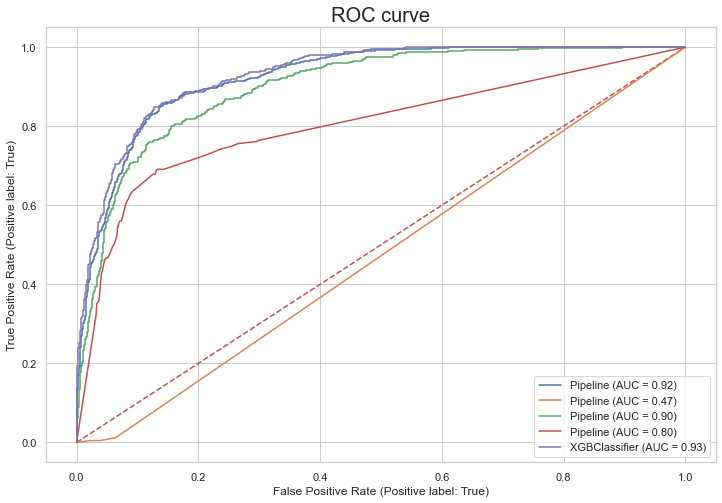

In [105]:
plt.figure(figsize=(12,8))
plt.plot([0, 1], [0, 1], 'r--')
ax = plt.gca()
for model_name in model_names:
    curr_model = eval(model_name)
   
    plot_roc_curve(curr_model, X_test, y_test, ax=ax)
    plt.title('ROC curve', size=20)

In [106]:
y_prob = rf_final.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_prob)

0.92429715665903

In [107]:
def threshold(model, category, m):
    pred=(model.predict_proba(X_test)[:,category]>m).astype(int)
    print(classification_report(y_test,pred))

In [108]:
threshold(rf_final,1, 0.5)

              precision    recall  f1-score   support

       False       0.96      0.90      0.92      2055
        True       0.60      0.79      0.68       411

    accuracy                           0.88      2466
   macro avg       0.78      0.84      0.80      2466
weighted avg       0.90      0.88      0.88      2466



In [109]:
threshold(tuned_xgb,1, 0.5)


              precision    recall  f1-score   support

       False       0.92      0.96      0.94      2055
        True       0.73      0.58      0.64       411

    accuracy                           0.89      2466
   macro avg       0.83      0.77      0.79      2466
weighted avg       0.89      0.89      0.89      2466



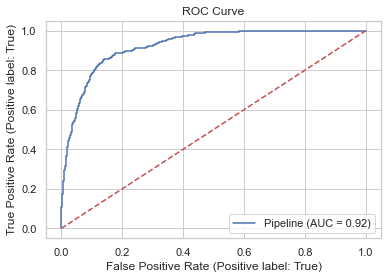

In [110]:
plot_roc_curve(rf_final, X_test, y_test)
plt.title('ROC Curve')
plt.plot([0, 1], [0, 1], 'r--')
plt.show()

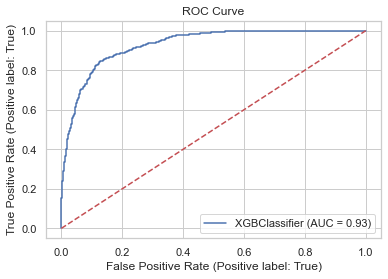

In [111]:
plot_roc_curve(tuned_xgb, X_test, y_test)
plt.title('ROC Curve')
plt.plot([0, 1], [0, 1], 'r--')
plt.show()

The result from all the experiments we did, random forest with Random under sampling technique outperforms and predicted whether customers will purchase or  not , with around 87% accuracy.
